In [2]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import wilcoxon



plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (12,8)

maximum_nfv = 160 * 192 * 224

### EXPERIMENT 1
Predicted dice/nfv vs target dice/nfv using BlandAltman plot

In [4]:
hyperpredict_optimal_registration = pd.read_csv("../results/symnet_niftyreg/mean_encoding_2HLnfv_nfv_194404_no_loss_weight_label.csv")
hyperpredict_optimal_registration = hyperpredict_optimal_registration[hyperpredict_optimal_registration["predicted_nfv"] < (0.005 * maximum_nfv)]
selected_labels = ["Accumbens", "Amygdala", "Caudate", "Hippocampus", "Pallidum", "Putamen", "Thalamus"]
hyperpredict_optimal_registration = hyperpredict_optimal_registration[hyperpredict_optimal_registration["label"].isin(selected_labels)].reset_index(drop=True)
hyperpredict_optimal_registration = hyperpredict_optimal_registration.groupby(["pair_idx", "label"]).apply(lambda x: x.loc[x['predicted_dice'].idxmax()]).reset_index(drop=True)
hyperpredict_optimal_registration["predicted_nfv"] = hyperpredict_optimal_registration["predicted_nfv"]/2


In [6]:
hyperpredict_bland_altman = pd.read_csv("../results/symnet_niftyreg/optimal_hp_0.5%_hyperpredict_niftyreg_retrained.csv")
hyperpredict_bland_altman = hyperpredict_bland_altman.drop(columns=['label'])
hyperpredict_bland_altman = hyperpredict_bland_altman.groupby(['moving_index', 'fixed_index']).mean().reset_index()

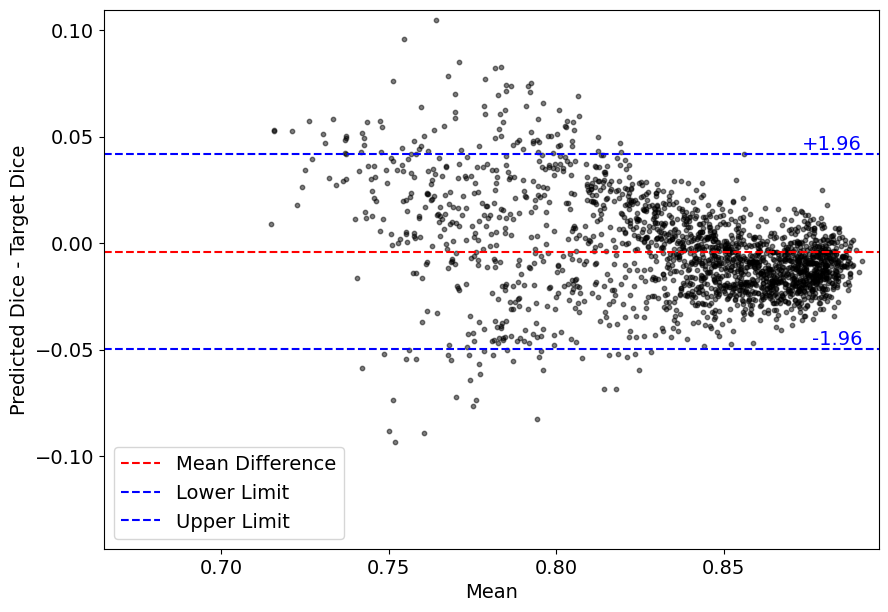

In [7]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 7))
differences = hyperpredict_bland_altman['predicted_dice'] - hyperpredict_bland_altman['target_dice']
means = (hyperpredict_bland_altman['predicted_dice'] + hyperpredict_bland_altman['target_dice']) / 2

mean_difference = np.mean(differences)
std_difference = np.std(differences)
lower_limit = mean_difference - 1.96 * std_difference
upper_limit = mean_difference + 1.96 * std_difference

plt.scatter(means, differences, color='black', s=10, alpha= 0.5)
plt.axhline(mean_difference, color='red', linestyle='--', label='Mean Difference')
plt.axhline(lower_limit, color='blue', linestyle='--', label='Lower Limit')
plt.axhline(upper_limit, color='blue', linestyle='--', label='Upper Limit')

plt.xlim(min(means) - 0.05, max(means) + 0.005)
plt.ylim(min(differences) - 0.05, max(differences) + 0.005)

plt.text(max(means), upper_limit , '+1.96', ha='right', va='bottom', color='blue')
plt.text(max(means), lower_limit, '-1.96', ha='right', va='bottom', color='blue')
plt.xlabel('Mean')
plt.ylabel('Predicted Dice - Target Dice')
plt.legend(loc = "lower left")
plt.show()

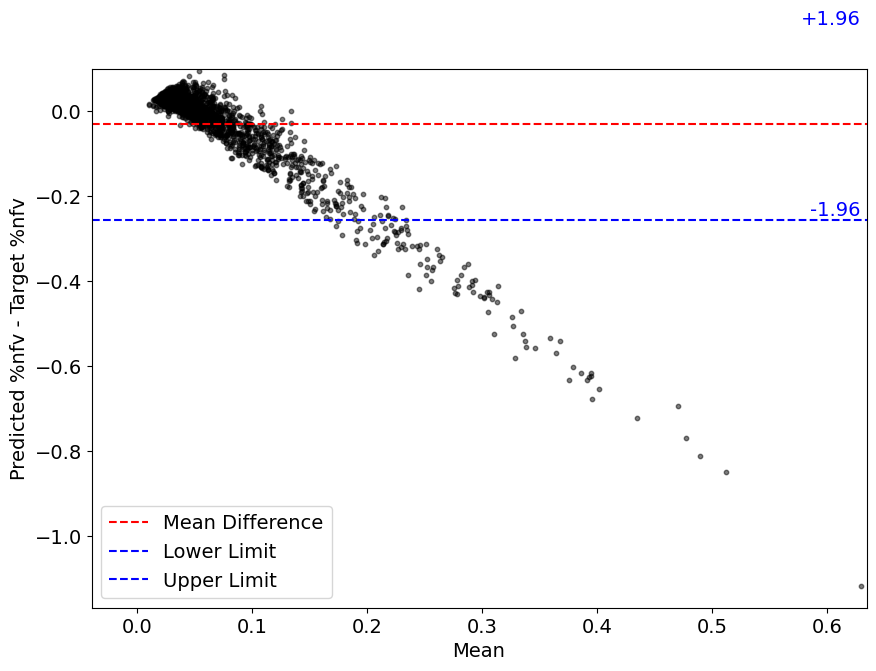

In [8]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 7))
differences = (hyperpredict_bland_altman['predicted_nfv']/maximum_nfv * 100) - (hyperpredict_bland_altman['target_nfv']/maximum_nfv * 100)
means = ((hyperpredict_bland_altman['predicted_nfv']/maximum_nfv*100) +( hyperpredict_bland_altman['target_nfv']/maximum_nfv*100)) / 2

mean_difference = np.mean(differences)
std_difference = np.std(differences)
lower_limit = mean_difference - 1.96 * std_difference
upper_limit = mean_difference + 1.96 * std_difference

plt.scatter(means, differences, color='black', s=10, alpha= 0.5)
plt.axhline(mean_difference, color='red', linestyle='--', label='Mean Difference')
plt.axhline(lower_limit, color='blue', linestyle='--', label='Lower Limit')
plt.axhline(upper_limit, color='blue', linestyle='--', label='Upper Limit')

plt.xlim(min(means) - 0.05, max(means) + 0.005)
plt.ylim(min(differences) - 0.05, max(differences) + 0.005)

plt.text(max(means), upper_limit , '+1.96', ha='right', va='bottom', color='blue')
plt.text(max(means), lower_limit, '-1.96', ha='right', va='bottom', color='blue')
plt.xlabel('Mean')
plt.ylabel('Predicted %nfv - Target %nfv')
plt.legend(loc = "lower left")
plt.show()

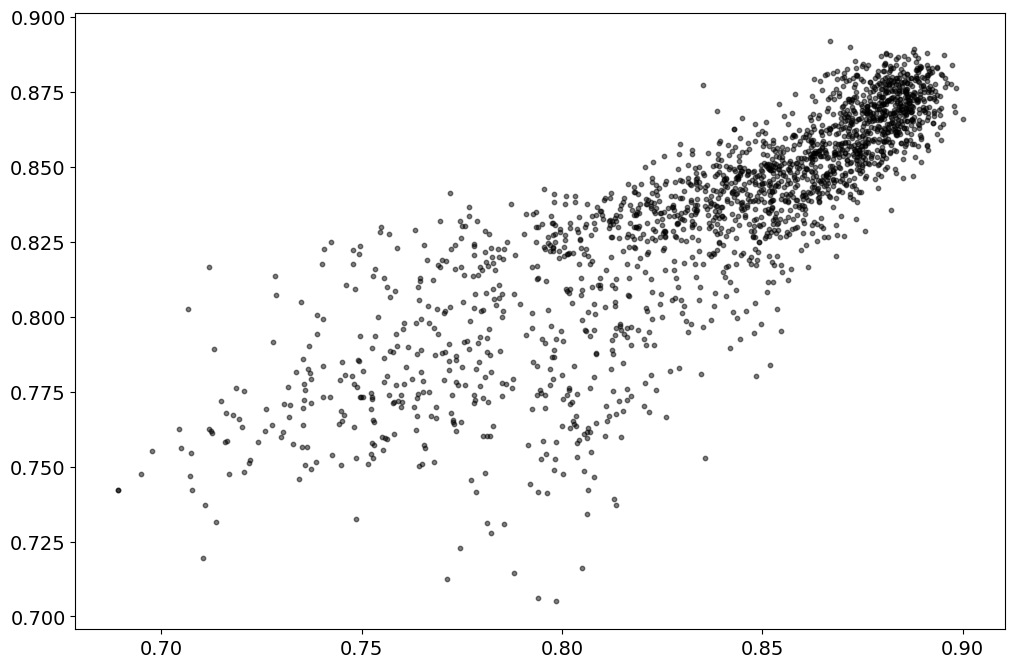

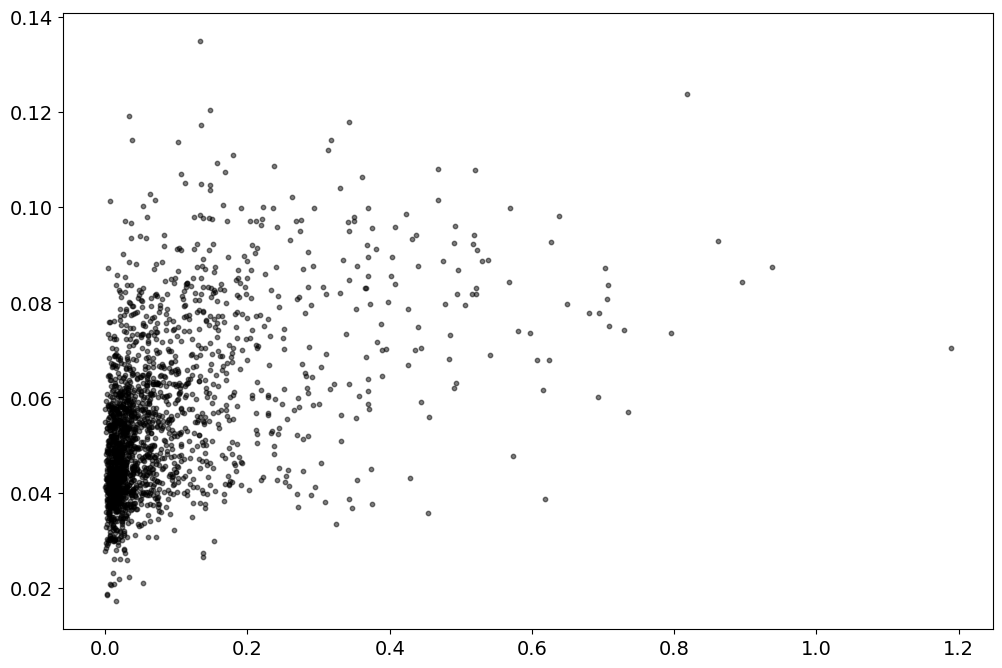

In [9]:
plt.scatter(hyperpredict_bland_altman['target_dice'], hyperpredict_bland_altman['predicted_dice'], color='black', s=10, alpha= 0.5)
plt.show()

plt.scatter(hyperpredict_bland_altman['target_nfv']/maximum_nfv*100, hyperpredict_bland_altman['predicted_nfv']/maximum_nfv*100, color='black', s=10, alpha= 0.5)
plt.show()

In [10]:
#statistical analysis
#mean difference bbetween predicted and target dice
hyperpredict_bland_altman["dice_difference"] = abs(hyperpredict_bland_altman["predicted_dice"] - hyperpredict_bland_altman["target_dice"])
mean_difference = hyperpredict_bland_altman["dice_difference"].mean()
std = hyperpredict_bland_altman["dice_difference"].std()
print("mean and standard deviation of dice difference: ", mean_difference, std)

mean and standard deviation of dice difference:  0.018342903802577207 0.015024168030774412


In [11]:
#mean difference bbetween predicted and target nfv
hyperpredict_bland_altman["nfv_difference"] = abs((hyperpredict_bland_altman["predicted_nfv"]/maximum_nfv *100) - (hyperpredict_bland_altman["target_nfv"]/maximum_nfv *100))
mean_difference = hyperpredict_bland_altman["nfv_difference"].mean()
std = hyperpredict_bland_altman["nfv_difference"].std()
print("mean and standard deviation of nfv difference: ", mean_difference, std)

mean and standard deviation of nfv difference:  0.0629877048048592 0.10088454295397345


### MAE of difference

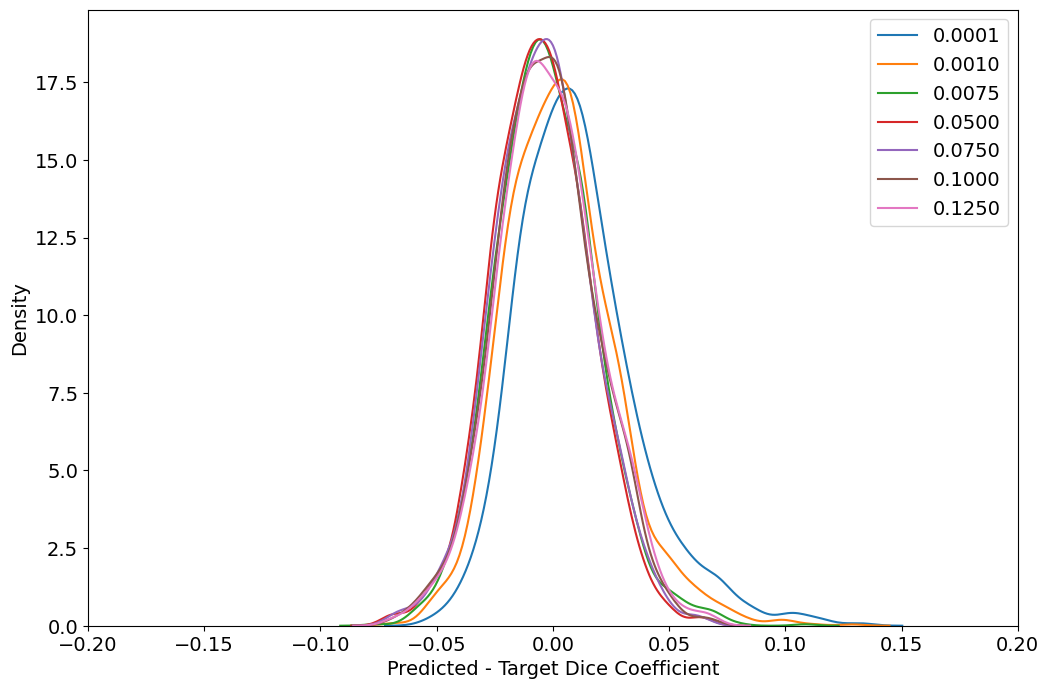

In [13]:
import pandas as pd
hyperpredict_bland_altman_mae = pd.read_csv("../results/symnet_niftyreg/sampled_lamda_values_images.csv")
hyperpredict_bland_altman_mae["dice_difference"] = hyperpredict_bland_altman_mae["predicted_dice"] - hyperpredict_bland_altman_mae["target_dice"]
hyperpredict_bland_altman_mae["nfv_difference"] = (hyperpredict_bland_altman_mae["predicted_nfv"]/ maximum_nfv)*100 - (hyperpredict_bland_altman_mae["target_nfv"]/maximum_nfv)*100

be = [0.05 , 0.075, 0.1  , 0.125, 1. ]

hyperpredict_bland_altman_mae = hyperpredict_bland_altman_mae[hyperpredict_bland_altman_mae["be"] != 1.0]

for i in hyperpredict_bland_altman_mae["be"].unique():
    data = hyperpredict_bland_altman_mae[hyperpredict_bland_altman_mae["be"] == i]
    #plot kde and format the label to 2 decimal places
    li = "{:.4f}".format(i)
    sns.kdeplot(data=data, x="dice_difference", label=li) #formart the label to 2 decimal places
    
plt.xlabel("Predicted - Target Dice Coefficient")
plt.legend()
plt.xlim(-0.2, 0.2)
plt.show()


In [ ]:
hyperpredict_bland_altman_mae = hyperpredict_bland_altman_mae[hyperpredict_bland_altman_mae["be"] != 1.0]

for i in hyperpredict_bland_altman_mae["be"].unique():
    data = hyperpredict_bland_altman_mae[hyperpredict_bland_altman_mae["be"] == i]
    #plot kde and format the label to 2 decimal places
    li = "{:.4f}".format(i)
    sns.kdeplot(data=data, x="nfv_difference", label=li) #formart the label to 2 decimal places
    
plt.xlabel("Predicted - Target %nfv")
plt.legend()
plt.xlim(-0.2, 0.2)
plt.show()



### Experiment 2
using optimal hp(selected for specific labels and < 0.05% of nfv>) for each pair, ran optimal samples on clpairn and compared it with CV using a single HP for entire set

90649


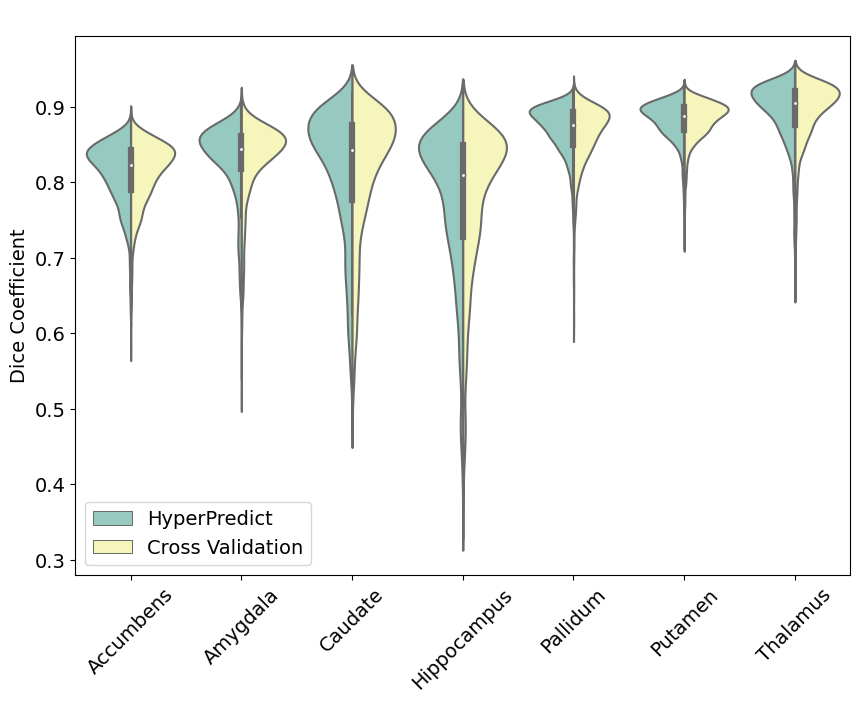

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


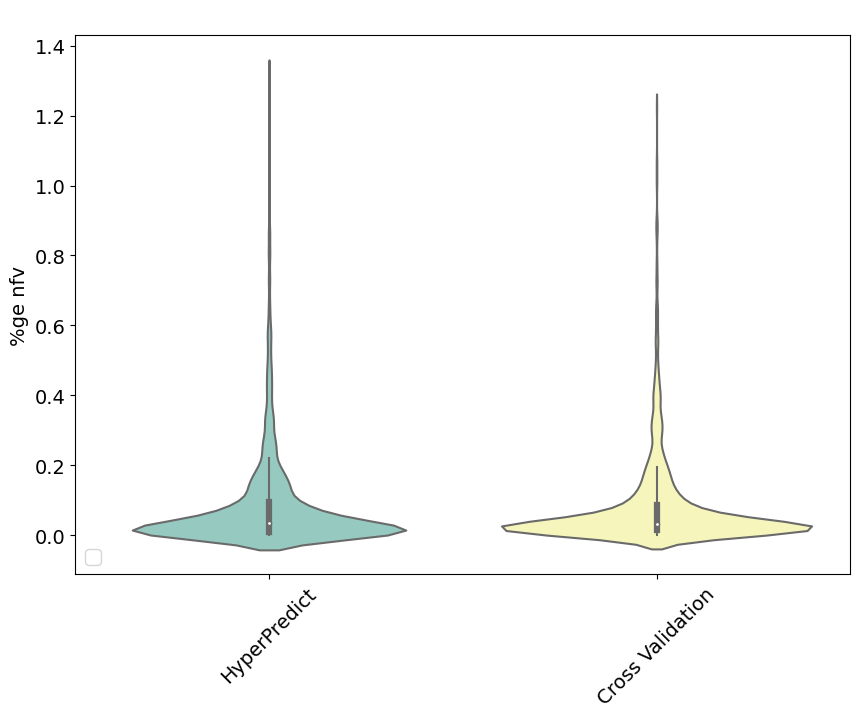

In [15]:
#plot violin plot
import pandas as pd
hyperpredict_exp2 = pd.read_csv("../results/symnet_niftyreg/optimal_hp_0.5%_hyperpredict_niftyreg_retrained.csv")

hyperpredict_exp2.rename(columns={"target_dice": "dice"}, inplace=True)
hyperpredict_exp2.rename(columns={"target_nfv": "nfv"}, inplace=True)
print(hyperpredict_exp2["nfv"].max())
hyperpredict_exp2["Method"] = "HyperPredict"
selected_labels = ["Accumbens", "Amygdala", "Caudate", "Hippocampus", "Pallidum", "Putamen", "Thalamus"]
hyperpredict_exp2 = hyperpredict_exp2[hyperpredict_exp2["label"].isin(selected_labels)].reset_index(drop=True)


cross_validation_exp2 =  pd.read_csv("../results/cross_validation/niftyreg/niftyreg_grid_search_optimal_0.0075.csv")
cross_validation_exp2 = cross_validation_exp2[cross_validation_exp2["label"].isin(selected_labels)].reset_index(drop=True)
cross_validation_exp2.rename(columns={"target_dice": "dice"}, inplace=True)
cross_validation_exp2.rename(columns={"target_nfv": "nfv"}, inplace=True)
cross_validation_exp2["Method"] = "Cross Validation"

hyperpredict_vs_crossval = pd.concat([hyperpredict_exp2, cross_validation_exp2])
hyperpredict_vs_crossval["nfv_percentage"] = (hyperpredict_vs_crossval["nfv"] / maximum_nfv) *100

#plot
plt.figure(figsize=(10, 7))
plt.rcParams.update({'font.size': 14})
sns.violinplot(x="label", y="dice", hue="Method", data=hyperpredict_vs_crossval, palette="Set3", split=True, as_cmap=True)
plt.title(" ");
plt.xlabel("");
plt.ylabel("Dice Coefficient");
plt.xticks(rotation=45)
plt.grid(False)
plt.legend(loc='lower left')
plt.show();


plt.figure(figsize=(10, 7))
plt.rcParams.update({'font.size': 14})


sns.violinplot(x="Method", y="nfv_percentage", data=hyperpredict_vs_crossval, palette="Set3", hue=None, split=False, as_cmap=True)

plt.title(" ");
plt.xlabel("");
plt.ylabel("%ge nfv");
plt.xticks(rotation=45)
plt.grid(False)
plt.legend(loc='lower left')
plt.show();



In [16]:
#statistical analysis
merged_df = pd.merge(hyperpredict_exp2, cross_validation_exp2, on=['moving_index', 'fixed_index', 'label'])
merged_df["dice_difference"] = abs(merged_df["dice_x"] - merged_df["dice_y"])
mean_difference = merged_df["dice_difference"].mean()
std = merged_df["dice_difference"].std()
print("mean and standard deviation of dice difference: ", mean_difference, std)

merged_df["nfv_difference"] = abs((merged_df["nfv_x"]/maximum_nfv *100) - (merged_df["nfv_y"]/maximum_nfv *100))
mean_difference = merged_df["nfv_difference"].mean()
std = merged_df["nfv_difference"].std()
print("mean and standard deviation of nfv difference: ", mean_difference, std)

# wilcoxon signed rank test
hyperpredict_exp2_wilcoxon = hyperpredict_exp2.drop(columns=['Method'], inplace=True)
hyperpredict_exp2_wilcoxon = hyperpredict_exp2.groupby(['label']).mean().reset_index()
cross_validation_exp2_wilcoxon = cross_validation_exp2.drop(columns=['Method'], inplace = True)
cross_validation_exp2_wilcoxon = cross_validation_exp2.groupby(['label']).mean().reset_index()
merged_df_wilcoxon = pd.merge(hyperpredict_exp2_wilcoxon, cross_validation_exp2_wilcoxon, on=['label'])

dice_statistics, dice_p_value  = wilcoxon(merged_df_wilcoxon["dice_x"], merged_df_wilcoxon["dice_y"])
print("dice wilcoxon: ", dice_p_value)
nfv_statistics, nfv_p_value = wilcoxon(merged_df_wilcoxon["nfv_x"]/maximum_nfv*100, merged_df_wilcoxon["nfv_y"]/maximum_nfv*100)
print("nfv wilcoxon: ", nfv_p_value)


mean and standard deviation of dice difference:  0.005536188363684892 0.010371887820891924
mean and standard deviation of nfv difference:  0.06272147315020153 0.10689255951245479
dice wilcoxon:  0.03125
nfv wilcoxon:  0.578125


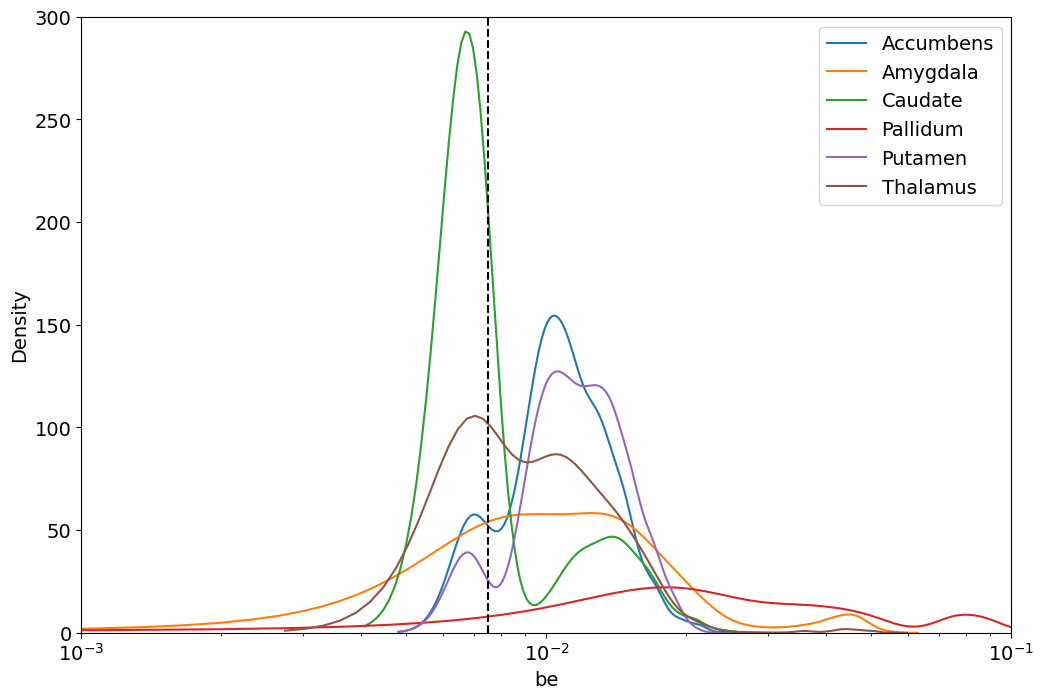

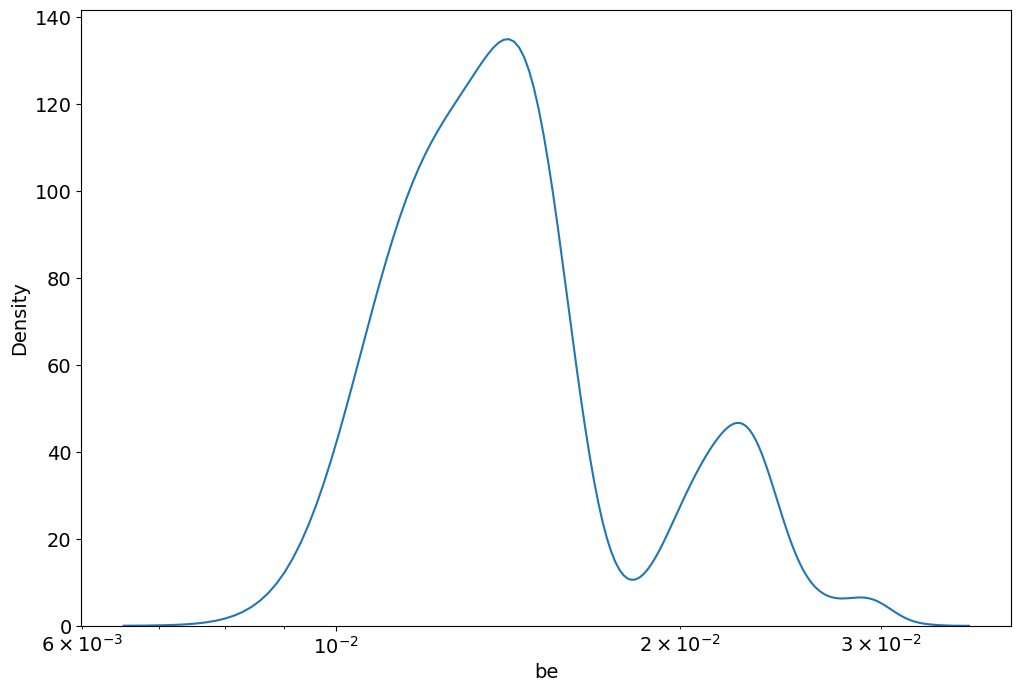

In [17]:
for label in hyperpredict_exp2['label'].unique():
    if label != "Hippocampus":
        subset_data = hyperpredict_exp2[hyperpredict_exp2['label'] == label]
        sns.kdeplot(data=subset_data, x='be', label=label)


plt.axvline(x=0.0075, color='black', linestyle='--')
plt.xlabel('be')
plt.xscale('log')
plt.xlim(0.001, 0.1)
plt.ylim(0, 300)
plt.ylabel('Density')
plt.legend()
plt.show()


hyperpredict_exp2_img_dist = hyperpredict_exp2.drop(columns=["label"])
hyperpredict_exp2_img_dist = hyperpredict_exp2_img_dist.groupby(["pair_idx"]).mean().reset_index()
sns.kdeplot(data=hyperpredict_exp2_img_dist, x='be')
plt.xlabel('be')
plt.ylabel('Density')
plt.xscale('log')
plt.show()

### EXPERIMENT 4
Optimal Hyperparameter per label

/tmp/ipykernel_638658/2788499514.py:22: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 0.8);


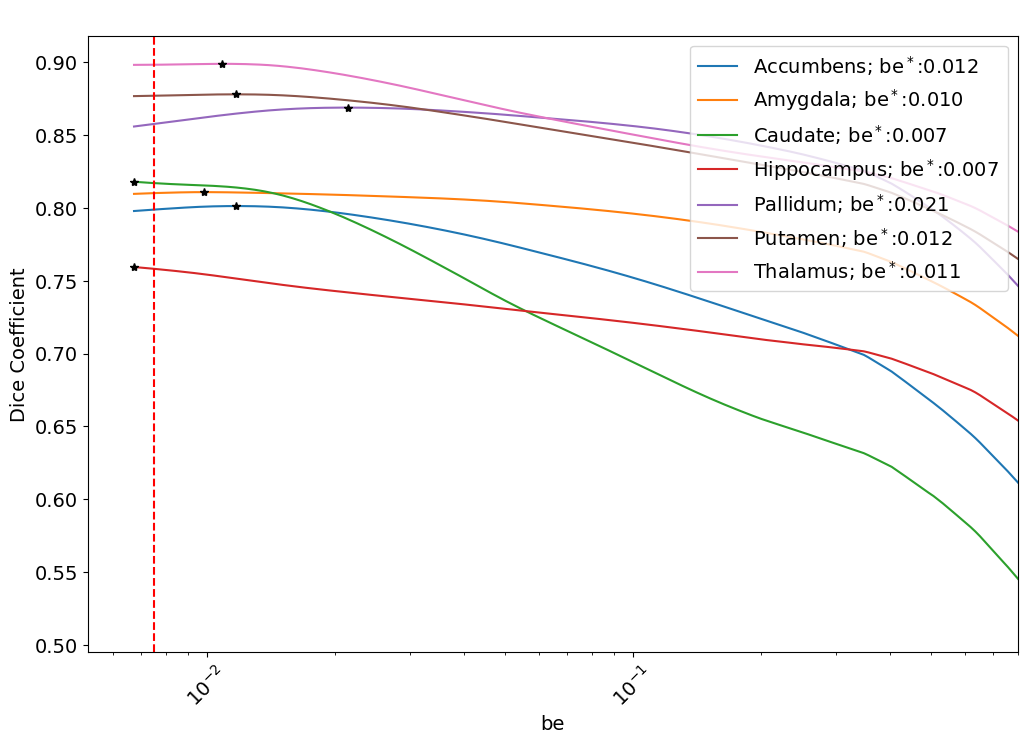

In [22]:
hyperpredict_exp4 = pd.read_csv("../results/symnet_niftyreg/mean_encoding_2HLnfv_nfv_194404_no_loss_weight_label.csv")

hyperpredict_exp4 = hyperpredict_exp4[hyperpredict_exp4["predicted_nfv"] < (0.005 * maximum_nfv)].reset_index(drop=True)
hyperpredict_exp4 = hyperpredict_exp4.groupby(['label', 'be']).mean().reset_index()
short_label = ['Thalamus',  'Amygdala', 'Pallidum', 'Caudate', 'Hippocampus', 'Putamen', 'Accumbens']

for idx, label in enumerate(hyperpredict_exp4["label"].unique()):
    if label in short_label:
        be_max_index = hyperpredict_exp4["be"][hyperpredict_exp4[hyperpredict_exp4["label"] == label]["predicted_dice"].idxmax()]
        maximum_value = hyperpredict_exp4[hyperpredict_exp4["label"] == label]["predicted_dice"].max()
        lam = hyperpredict_exp4[hyperpredict_exp4["label"] == label]["be"]
        sns.lineplot(x = lam, y = hyperpredict_exp4[hyperpredict_exp4["label"] == label]["predicted_dice"],label = f"{label}; be$^*$:{be_max_index:.3f} ")
        plt.plot(be_max_index, maximum_value, '*', color='black')

plt.axvline(x=0.0075, color='red', linestyle='--', alpha = 1.0)
plt.legend(loc="upper right")
plt.xlabel("be")
plt.ylabel("Dice Coefficient")
plt.xticks(rotation=45)
plt.xscale('log')
plt.title(" ");
plt.xlim(0, 0.8);
plt.show();

### APPENDIX A1: Selecting spacing

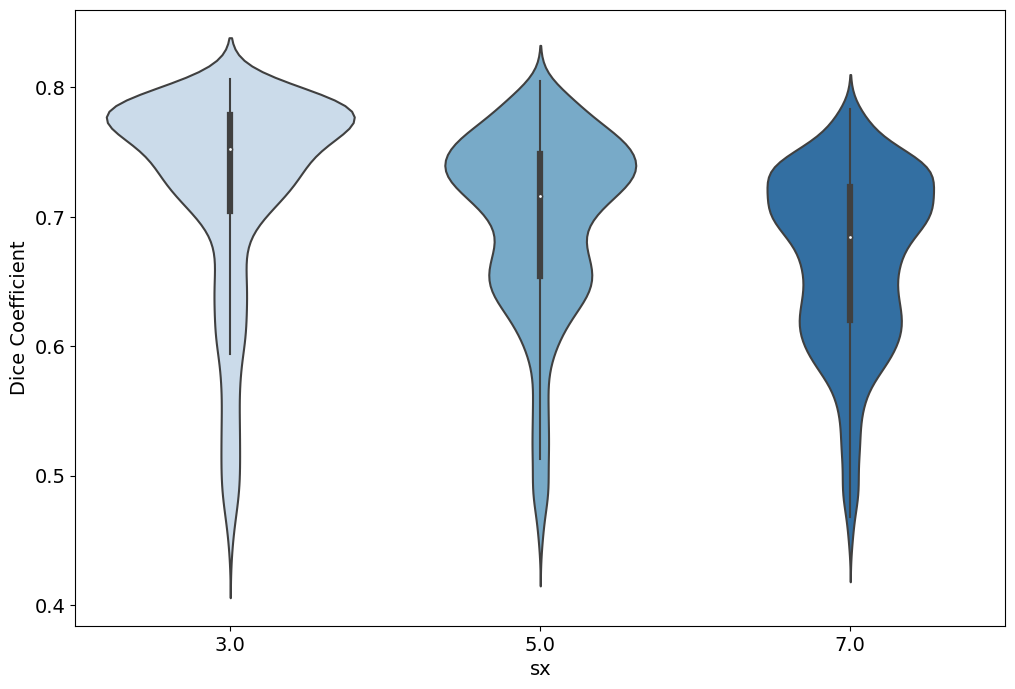

In [26]:
selecting_spacing = pd.read_csv("../results/symnet_niftyreg/selecting_spacing.csv")
selecting_spacing = selecting_spacing[selecting_spacing["predicted_nfv"] < (0.005 * maximum_nfv)].reset_index(drop=True)

selecting_spacing.head(20)
#plot violin plot for each sx
plt.rcParams.update({'font.size': 14})
sns.violinplot(x="sx", y="predicted_dice", data=selecting_spacing, palette="Blues", hue=None, split=False, as_cmap=True)
plt.xlabel("sx")
plt.ylabel("Dice Coefficient")
plt.show()



### COMPARING ALTERNATE METHODS

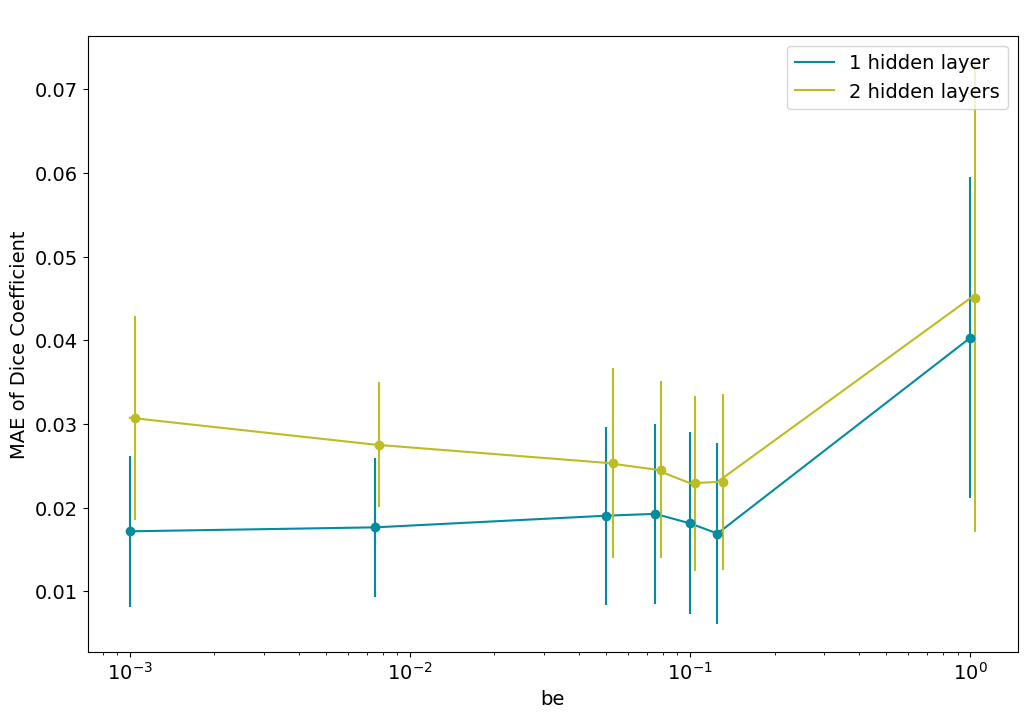

In [30]:
#using 1 hidden layer
one_hidden_layer = pd.read_csv("../results/symnet_niftyreg/alternative_models/mean_encoding_main_hyperpredict_network_1hidden_layers_image_target_values.csv")
two_hidden_layers = pd.read_csv("../results/symnet_niftyreg/alternative_models/mean_encoding_main_hyperpredict_network_2hidden_layers_image_target_values.csv")
be = one_hidden_layer["be"].unique()
lam_log = np.where(be > 0, np.log(be), np.log(be + 1e-5))


x_errorbar = [0.00002,0.00013 ,0.0015,0.0017,0.0020,0.003,0.02] 

one_hidden_layer["dice_difference"] = abs(one_hidden_layer["predicted_dice"] - one_hidden_layer["target_dice"])
one_hidden_layer["std_dev"] = np.std(one_hidden_layer["predicted_dice"] - one_hidden_layer["target_dice"], axis = 0)
mean_difference =  one_hidden_layer.groupby("be").mean().reset_index()
std_dev = one_hidden_layer.groupby("be").std().reset_index()
sns.lineplot(x=be, y=mean_difference["dice_difference"], color="#028ca1")
plt.errorbar(be, mean_difference["dice_difference"], yerr=std_dev["dice_difference"], fmt='o', color = '#028ca1')


#two hidden layers
two_hidden_layers["dice_difference"] = abs(two_hidden_layers["predicted_dice"] - two_hidden_layers["target_dice"])
mean_difference =  two_hidden_layers.groupby("be").mean().reset_index()
std_dev = two_hidden_layers.groupby("be").std().reset_index()
sns.lineplot(x=be, y=mean_difference["dice_difference"], color="#bcbd22")
plt.errorbar([x*2 for x in x_errorbar]+be, mean_difference["dice_difference"], yerr=std_dev["dice_difference"], fmt='o', color = '#bcbd22')


custom_legend = [
    plt.Line2D([0], [0], color='#028ca1',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#bcbd22', linestyle='-', markersize=5),
]
legend_labels = ['1 hidden layer', '2 hidden layers']

plt.legend(custom_legend, legend_labels)
plt.title(" ");
plt.xlabel("be");
plt.ylabel("MAE of Dice Coefficient");
plt.xscale("log")
plt.show()


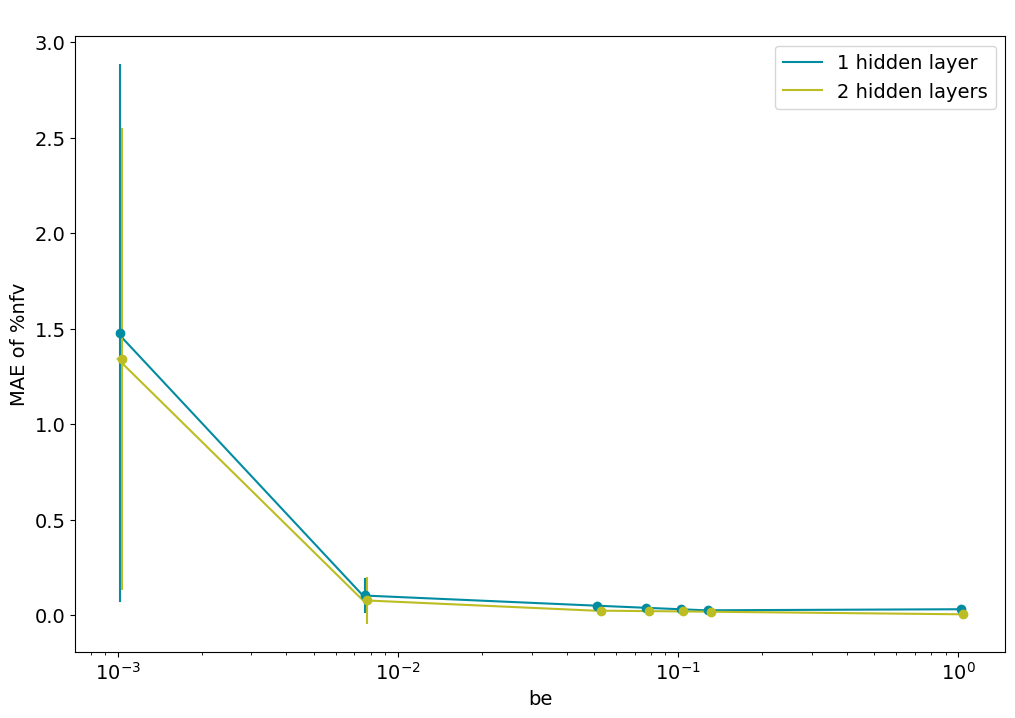

In [31]:
#nfv difference
one_hidden_layer["nfv_difference"] = abs((one_hidden_layer["predicted_nfv"]/ maximum_nfv)*100 - (one_hidden_layer["target_nfv"]/maximum_nfv)*100)
mean_difference =  one_hidden_layer.groupby("be").mean().reset_index()
std_dev = one_hidden_layer.groupby("be").std().reset_index()
sns.lineplot(x=be, y=mean_difference["nfv_difference"], color="#028ca1")
plt.errorbar(x_errorbar + be, mean_difference["nfv_difference"], yerr=std_dev["nfv_difference"], fmt='o', color = '#028ca1')

two_hidden_layers["nfv_difference"] = abs((two_hidden_layers["predicted_nfv"]/ maximum_nfv)*100 - (two_hidden_layers["target_nfv"]/maximum_nfv)*100)
mean_difference =  two_hidden_layers.groupby("be").mean().reset_index()
std_dev = two_hidden_layers.groupby("be").std().reset_index()
sns.lineplot(x=be, y=mean_difference["nfv_difference"], color="#bcbd22", errorbar="sd")
plt.errorbar([x*2 for x in x_errorbar]+be, mean_difference["nfv_difference"], yerr=std_dev["nfv_difference"], fmt='o', color='#bcbd22')


custom_legend = [
    plt.Line2D([0], [0], color='#028ca1', linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#bcbd22', linestyle='-', markersize=5),
]
legend_labels = ['1 hidden layer', '2 hidden layers',]

plt.legend(custom_legend, legend_labels)
plt.title(" ");
plt.xlabel("be");
plt.ylabel("MAE of %nfv");
plt.xscale('log')
plt.show()


### APPENDIX 4: Smooth interpolation


In [ ]:
from hyperpredict import hyper_predict, HyperPredictLightningModule
from utils import SetParams
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

registration_model = "niftyreg"
encoder_model = "symnet"
datapath = "data/oasis/"
pretrained_path = "models/pretrained_models/"
encoder_path = "symnet.pth"
start_channel = 4
range_flow = 0.4
imgshape = (160, 192, 224)
imgshape_4 = (160 / 4, 192 / 4, 224 / 4)
imgshape_2 = (160 / 2, 192 / 2, 224 / 2)
train_batch_size =1
validation_batch_size = 1
test_batch_size = 1
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
batch_size = 1
maximum_nfv = 160 * 192 * 224

encoder = SetParams.set_encoder(encoder_model,  pretrained_path + encoder_path, start_channel, imgshape, imgshape_2, imgshape_4, range_flow)
training_generator, validation_generator, test_generator, testing_sub = SetParams.set_oasis_data(datapath, train_batch_size, validation_batch_size, test_batch_size, encoder_model)

print("data loaded", len(training_generator), len(validation_generator), len(test_generator), len(testing_sub))
select_in_features = {"clapirn_clapirn": 32, "clapirn_niftyreg": 80, "symnet_clapirn": 88, "symnet_niftyreg": 120}

# select_in_features = {"clapirn_clapirn": 64, "clapirn_niftyreg": 80, "symnet_clapirn": 200, "symnet_niftyreg": 232}
in_features = select_in_features[encoder_model + "_" + registration_model]
out_features = 36
mapping_features = 16 if encoder_model == "clapirn" else 32
model = HyperPredictLightningModule(hyper_predict(in_features, mapping_features, out_features),  registration_model, encoder_model, imgshape, encoder, batch_size)
model.load_state_dict(torch.load("models/checkpoints/symnet_niftyreg/total_val_loss=0.00691-epoch=17-logger-mean_encoding_2HLnfv_nfv_194404_no_loss_weight.ckpt")["state_dict"])


be = np.linspace(-5, 0, 500)
be = np.exp(be)
# be = [0.001,0.0075, 0.05, 0.075, 0.1, 0.125, 1]
sx = 5
for params in model.parameters():
    params.requires_grad = False


model.eval()
model.to(device)
# dice per image per be
columns = ["pair_idx", "moving_index", "fixed_index", "predicted_dice", "be", "sx", "predicted_nfv"]

dice_average_per_image_per_be = pd.DataFrame(columns = columns)

#dataframe for dice per label 
columns_label = ["pair_idx","moving_index", "fixed_index", "predicted_dice","be", "sx", "label", "predicted_nfv"]

dice_average_per_label_per_be = pd.DataFrame(columns = columns_label)
count  = 1
print("len test generator", len(testing_sub))
with torch.no_grad():
    for pair_idx, data in enumerate(testing_sub):
        if pair_idx > 0:
            break
        
        pred = []
        tar = []    
        data[0:4] = [d.to(device) for d in data[0:4]]
        per_image, per_label = model.test_niftyreg_200_be(pair_idx, data, be, sx)
  
        
        print(count)
        count += 1
        

       

        

